In [66]:
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import pandas as pd
from collections import OrderedDict
from pandas import ExcelWriter
from pandas import ExcelFile

In [67]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [68]:
url='http://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;template=results;type=batting;view=innings'
html = urllib.request.urlopen(url, context=ctx).read()
player_name = ''

In [69]:
def get_table_headers():
    global player_name
    bs=BeautifulSoup(html, "lxml")
    mydivs = bs.findAll("div", {"class": "icc-home"})
    player_name = mydivs[0].findAll("a")[0].text.split("/")[2]
    temp_data=OrderedDict()
    list_of_dict=[]
    bs=BeautifulSoup(html, "lxml")
    headers_soup=bs.find_all("tr",{"class":"headlinks"})
    headers_tag = headers_soup[0].find_all("th")
    list_of_headers = []
    for header in headers_tag:
        list_of_headers.append(header.text)
    return list_of_headers    


In [70]:
def get_stats_list():
    temp_data=OrderedDict()
    list_of_dict=[]
    bs=BeautifulSoup(html, "lxml")
    table_body=bs.find_all('tbody')
    stats_table = table_body[1]
    rows = stats_table.find_all("tr")
    table_data_list = []
    for row in rows:
        row_data = []
        col = row.find_all("td")
        row_data = [c.text.strip() for c in col]
        table_data_list.append(row_data)
    return table_data_list    
    

In [71]:
list_of_headers = get_table_headers()
list_of_headers[-1] = 'Match No'
table_data_list = get_stats_list()

In [72]:
data_frame = pd.DataFrame(table_data_list)
data_frame.columns = list_of_headers

In [73]:
data_frame = data_frame.drop('', 1)


In [74]:
data_frame

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756
5,2*,6,2,0,0,100.00,7,not out,1,v Sri Lanka,Colombo (RPS),14 Sep 2009,ODI # 2889
6,16,28,24,1,0,66.66,4,caught,2,v Pakistan,Centurion,26 Sep 2009,ODI # 2898
7,TDNB,-,-,-,-,-,-,-,-,v Australia,Centurion,28 Sep 2009,ODI # 2901
8,79*,121,104,9,2,75.96,4,not out,2,v West Indies,Johannesburg,30 Sep 2009,ODI # 2904
9,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,25 Oct 2009,ODI # 2913


In [94]:
def formatRuns(runs):
    runs = runs.replace("*", '')
    try:
        return int(runs)
    except:
        return 0

In [76]:
def formatDate( date):
    year = date.split(" ")[-1]
    return year

In [77]:
data_frame = data_frame[data_frame.Runs!="DNB"] 

In [78]:
data_frame = data_frame[data_frame.Runs!="TDNB"] 

In [79]:
data_frame['Year'] = data_frame['Start Date'].apply(lambda date:formatDate(date))

In [80]:
indexed = data_frame.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this


In [81]:
indexed

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 1

In [82]:
data_frame

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,2008
5,2*,6,2,0,0,100.00,7,not out,1,v Sri Lanka,Colombo (RPS),14 Sep 2009,ODI # 2889,2009
6,16,28,24,1,0,66.66,4,caught,2,v Pakistan,Centurion,26 Sep 2009,ODI # 2898,2009
8,79*,121,104,9,2,75.96,4,not out,2,v West Indies,Johannesburg,30 Sep 2009,ODI # 2904,2009
9,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,25 Oct 2009,ODI # 2913,2009
10,10,32,16,1,0,62.50,3,caught,2,v Australia,Mohali,2 Nov 2009,ODI # 2919,2009


In [83]:
summary = data_frame.groupby(['Year'])

In [84]:
def calculate_average(data_frame):
    print(data_frame)
    total_runs = 0
    matches = 0
    for index, row in data_frame.iterrows():
        current_row_run = row['Runs']
        if '*' in current_row_run:
            run = current_row_run.replace("*",'')
            total_runs = total_runs + int(run)
        else:
            matches+=1
            total_runs = total_runs + int(current_row_run)
    print(total_runs)        
    return round((total_runs/matches),2)        

In [85]:
summary.first()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No
Year,,,,,,,,,,,,,
2008,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742
2009,2*,6,2,0,0,100.00,7,not out,1,v Sri Lanka,Colombo (RPS),14 Sep 2009,ODI # 2889
2010,9,19,12,1,0,75.00,3,caught,1,v Sri Lanka,Dhaka,5 Jan 2010,ODI # 2938
2011,54,122,70,2,1,77.14,3,caught,2,v South Africa,Durban,12 Jan 2011,ODI # 3079
2012,31,30,34,3,0,91.17,3,caught,2,v Australia,Melbourne,5 Feb 2012,ODI # 3231
2013,6,12,9,1,0,66.66,3,caught,2,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315
2014,123,179,111,11,2,110.81,3,caught,2,v New Zealand,Napier,19 Jan 2014,ODI # 3456
2015,9,24,16,0,0,56.25,4,caught,1,v Australia,Melbourne,18 Jan 2015,ODI # 3582
2016,91,148,97,9,1,93.81,3,caught,1,v Australia,Perth,12 Jan 2016,ODI # 3723


In [86]:
averages = []
for key, item in summary:
     averages.append(calculate_average(summary.get_group(key)))

  Runs Mins  BF 4s 6s     SR Pos Dismissal Inns   Opposition         Ground  \
0   12   33  22  1  0  54.54   2       lbw    1  v Sri Lanka       Dambulla   
1   37   82  67  6  0  55.22   2    caught    2  v Sri Lanka       Dambulla   
2   25   40  38  4  0  65.78   1   run out    1  v Sri Lanka  Colombo (RPS)   
3   54   87  66  7  0  81.81   1    bowled    1  v Sri Lanka  Colombo (RPS)   
4   31   45  46  3  1  67.39   1       lbw    2  v Sri Lanka  Colombo (RPS)   

    Start Date    Match No  
0  18 Aug 2008  ODI # 2742  
1  20 Aug 2008  ODI # 2745  
2  24 Aug 2008  ODI # 2750  
3  27 Aug 2008  ODI # 2755  
4  29 Aug 2008  ODI # 2756  
159
   Runs Mins   BF  4s 6s      SR Pos Dismissal Inns     Opposition  \
5    2*    6    2   0  0  100.00   7   not out    1    v Sri Lanka   
6    16   28   24   1  0   66.66   4    caught    2     v Pakistan   
8   79*  121  104   9  2   75.96   4   not out    2  v West Indies   
9    30   53   41   3  0   73.17   4    caught    2    v Australia 

In [87]:
averages

[31.8,
 54.17,
 47.38,
 47.62,
 68.4,
 52.83,
 58.56,
 36.65,
 92.38,
 76.84,
 133.56,
 64.4]

In [90]:
result
df = pd.DataFrame.from_records([result])
df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,31.8,54.17,47.38,47.62,68.4,52.83,58.56,36.65,92.38,76.84,133.56,64.4


In [95]:
data_frame["Runs"] = data_frame["Runs"].apply(lambda runs: formatRuns(runs))
summary_df = data_frame.groupby(['Year']).agg({'Runs': 'sum', 'Opposition': 'count'})

In [96]:
summary_df

,Runs,Opposition
Year,,
2008,159,5
2009,325,8
2010,995,24
2011,1381,34
2012,1026,17
2013,1268,30
2014,1054,20
2015,623,20
2016,739,10


In [101]:
rr=pd.Series(averages)
rr

0      31.80
1      54.17
2      47.38
3      47.62
4      68.40
5      52.83
6      58.56
7      36.65
8      92.38
9      76.84
10    133.56
11     64.40
dtype: float64

In [104]:
summary_df["Average"] = rr.values

In [105]:
summary_df

,Runs,Opposition,Average
Year,,,
2008,159,5,31.80
2009,325,8,54.17
2010,995,24,47.38
2011,1381,34,47.62
2012,1026,17,68.40
2013,1268,30,52.83
2014,1054,20,58.56
2015,623,20,36.65
2016,739,10,92.38


In [112]:
data_frame.reset_index(inplace=True)

In [113]:
data_frame

,index,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Average
0,0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18 Aug 2008,ODI # 2742,12.00
1,1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20 Aug 2008,ODI # 2745,24.50
2,2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24 Aug 2008,ODI # 2750,24.67
3,3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27 Aug 2008,ODI # 2755,32.00
4,4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29 Aug 2008,ODI # 2756,31.80
5,5,2*,6,2,0,0,100.00,7,not out,1,v Sri Lanka,Colombo (RPS),14 Sep 2009,ODI # 2889,32.20
6,6,16,28,24,1,0,66.66,4,caught,2,v Pakistan,Centurion,26 Sep 2009,ODI # 2898,29.50
7,8,79*,121,104,9,2,75.96,4,not out,2,v West Indies,Johannesburg,30 Sep 2009,ODI # 2904,42.67
8,9,30,53,41,3,0,73.17,4,caught,2,v Australia,Vadodara,25 Oct 2009,ODI # 2913,40.86
9,10,10,32,16,1,0,62.50,3,caught,2,v Australia,Mohali,2 Nov 2009,ODI # 2919,37.00


<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

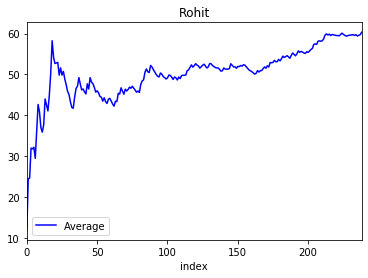

In [114]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Agg')
# from matplotlib.figure import Figure


plt.figure(figsize=(20,20))
plt.figure().suptitle('test title', fontsize=20)
data_frame.plot(kind='line',x="index",y='Average',color='Blue',title="Rohit")
# plt.savefig("file.jpg",dpi=200)
# data_frame.plot.line(x="index",y="Average")

plt.show()